# Curso de Big Data. Otoño 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar bien comentado (utilizando #) para que el código sea fácil de entender por sus compañeros y profesores.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo 24 de marzo a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub con el mensaje “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: v.oubina@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [15]:
import requests

# Notar que:
# $SITE_ID: MLA  # MLA es el sitio de Argentina
# item: item a buscar. (reemplazamos los espacios con %20)

buscar = "Camperon de River"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto
# Vemos el texto
response.text

<Response [200]>


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"Camperon de River","paging":{"total":32,"primary_results":8,"offset":0,"limit":50},"results":[{"id":"MLA1310000829","title":"River Camperón Térmico Venta Mínima 10 Prendas","condition":"new","thumbnail_id":"913364-MLA48813179494_012022","catalog_product_id":null,"listing_type_id":"gold_special","permalink":"https://articulo.mercadolibre.com.ar/MLA-1310000829-river-camperon-termico-venta-minima-10-prendas-_JM","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA7093","domain_id":"MLA-FOOTBALL_JACKETS","variation_id":"176349929491","thumbnail":"http://http2.mlstatic.com/D_913364-MLA48813179494_012022-O.jpg","currency_id":"ARS","order_backend":1,"price":68886.11,"original_price":null,"sale_price":null,"available_quantity":1,"official_store_id":null,"use_thumbnail_id":false,"accepts_mercadopago":true,"variation_filters":["COLOR","SIZE"],"shipping":{"store_pick_up":false,"free_shipping":true,"logistic_type":"xd_drop

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [21]:
data = response.json()
#type(data) # dict
data
import pandas as pd

# Convertir los datos en un DataFrame
df = pd.DataFrame(data['results'])

# Verificar la estructura del DataFrame
print(df.head())

# Calcular el precio promedio, mínimo y máximo
precio_promedio = df['price'].mean()
precio_minimo = df['price'].min()
precio_maximo = df['price'].max()

# Imprimir los resultados
print(f"Precio promedio: {precio_promedio}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")

              id                                              title condition  \
0  MLA1310000829     River Camperón Térmico Venta Mínima 10 Prendas       new   
1  MLA1398792693                        Camperón De River Gris 2018      used   
2  MLA1400785677  Camperon De Invierno adidas River Plate 2009 C...      used   
3  MLA1629342726        Camperon De River Plate Generico Casi Nuevo      used   
4  MLA1650762222                          Camperon Parka River 2018      used   

                   thumbnail_id catalog_product_id listing_type_id  \
0  913364-MLA48813179494_012022               None    gold_special   
1  818819-MLA74671571746_022024               None    gold_special   
2  616688-MLA73628722796_122023               None    gold_special   
3  801819-MLA73984483933_012024               None    gold_special   
4  795304-MLA74199945674_012024               None        gold_pro   

                                           permalink buying_mode site_id  \
0  https://artic

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

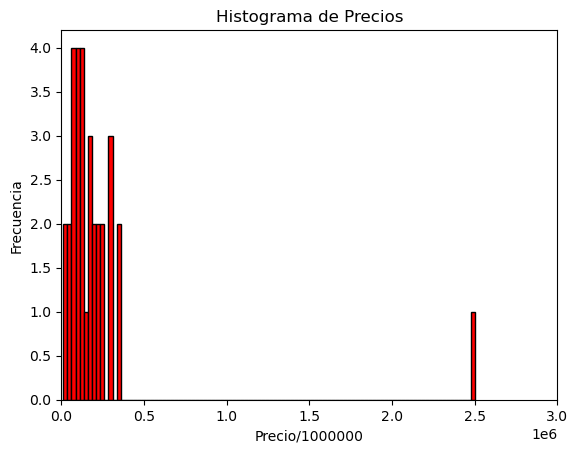

' Vemos un outlier, tiene un precio de 2500000 '

In [32]:
# Crear el histograma de precios utilizando solo Pandas y capturar el eje
ax = df['price'].plot.hist(bins=100, color='red', edgecolor='black')

# Establecer los límites del eje x
ax.set_xlim(left=0, right=3000000)  # Ajusta estos valores según sea necesario

# Agregar etiquetas y título
plt.xlabel('Precio/1000000')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

# Mostrar el histograma
plt.show()

""" Vemos un outlier, tiene un precio de 2500000 """

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [55]:
import requests

# Definir la categoría de interés
categoria = "MLA1459"  # Categoría de Hogar, Muebles y Jardín en Mercado Libre Argentina

# Construir la URL de la API de Mercado Libre para obtener productos de la categoría
url = f"https://api.mercadolibre.com/sites/MLA/search?category={categoria}"

# Hacer la solicitud a la API
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a formato JSON
    data = response.json()
    
    # Analizar los resultados obtenidos
    productos = data['results']

# Imprimir información sobre algunos productos
for producto in productos[:1000000]:
        print("Título:", producto['title'])
        print("Precio:", producto['price'])
        print("Condición:", producto['condition'])
        print("Vendedor:", producto['seller']['id'])
        print("Última actualización:", producto['last_updated'])
        print()
else:
    print("Error al hacer la solicitud a la API de Mercado Libre:", response.status_code)

""" En esta categoria puntual, podemos ver que se mezclan alquileres con ventas al contado y ventas financiadas. En los 3 casos, los precios no son para nada uniformes. Los valores para un alquiler son muy distintos a los de una venta al contado, y ambas son distintas al precio de un departamento cuyo precio en la publicacion es un deposito, y luego se financia. Recalcamos la importancia de revisar en cada categoria comportamiento similar, para podes llevar a cabo cualquier tipo de analisis. Asimismo, agregamos la fecha de publicacion a este codigo. El objetivo era observar las propiedades que llevaban mucho tiempo publicadas, dado que es muy probable que: 1)su precio no este actualizado y/o 2)no este mas a la venta o ya haya sido vendido. En ambos casos, estas publicaciones reflejan valores que no son "ciertos" pero afectan la media y cualquier conclusion que se pueda llevar a cabo sobre la categoria. """

Título: Departamento (dpto) En Almagro 2 Ambientes 38m2
Precio: 35400
Condición: used
Vendedor: 735780857


KeyError: 'last_updated'

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [68]:
pip install openpyxl requests

Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [111]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página de noticias de La Nación
url = "https://www.lanacion.com.ar/"

# Hacer la solicitud y obtener el contenido HTML
r = requests.get(url)
contenido = r.content

# Analizar el contenido HTML con BeautifulSoup
soup = BeautifulSoup(contenido, "html.parser")

# Encontrar todos los elementos <a> que contienen los enlaces a las noticias
news_links = soup.find_all('a', class_='link')

# Obtener los enlaces de las noticias y concatenar el dominio si es necesario
news_urls = ['https://www.lanacion.com.ar' + link['href'] for link in news_links]

# Crear un DataFrame con los enlaces de las noticias
df = pd.DataFrame(news_urls, columns=['Enlace'])

# Exportar el DataFrame a un archivo de Excel
df.to_excel('gallardo.xlsx', index=False)

# Imprimir mensaje de confirmación
print("Enlaces de las noticias guardados en 'gallardo.xlsx'")

Enlaces de las noticias guardados en 'gallardo.xlsx'


In [109]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página de noticias de La Nación
url = "https://www.lanacion.com.ar/"

# Hacer la solicitud y obtener el contenido HTML
r = requests.get(url)
contenido = r.content

# Analizar el contenido HTML con BeautifulSoup
soup = BeautifulSoup(contenido, "html.parser")

# Encontrar todos los elementos <a> que contienen los enlaces a las noticias
news_links = soup.find_all('a', class_='com-title')

# Obtener los enlaces de las noticias y concatenar el dominio si es necesario
news_urls = ['https://www.lanacion.com.ar' + link['href'] if not link['href'].startswith('http') else link['href'] for link in news_links]

# Crear un DataFrame con los enlaces de las noticias
df = pd.DataFrame(news_urls, columns=['Enlace'])

# Exportar el DataFrame a un archivo de Excel
df.to_excel('juanfer.xlsx', index=False)

# Imprimir mensaje de confirmación
print("Enlaces de las noticias guardados en 'juanfer.xlsx'")

Enlaces de las noticias guardados en 'juanfer.xlsx'


In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [80]:
# Hacer una solicitud a la página de noticias de La Nación
url = 'https://www.lanacion.com.ar/'
response = requests.get(url)

In [112]:
from IPython.display import FileLink

# Crear un enlace de descarga para el archivo de Excel
FileLink('gallardo.xlsx')

C:\Users\Santiago\Desktop\2024\1er cuatri\Big Data\Big data - TP 1\gallardo.xlsx

In [96]:
# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Parsear el HTML de la página de noticias
    soup = BeautifulSoup(response.content, 'html.parser')

In [83]:
# Encontrar todos los elementos <a> que contienen los enlaces a las noticias
news_links = soup.find_all('a', class_='com-title')

In [87]:
# Obtener los enlaces de las noticias y concatenar el dominio si es necesario
news_urls = ['https://www.lanacion.com.ar' + link['href'] if not link['href'].startswith('http') else link['href'] for link in news_links]

In [89]:
# Crear un DataFrame con los enlaces de las noticias
df = pd.DataFrame(news_urls, columns=['Enlace'])

In [101]:
# Exportar el DataFrame a un archivo de Excel
df.to_excel('enlaces_noticias_lanacion.xlsx', index=False)
    
print("Enlaces de las noticias guardados en 'enlaces_noticias_lanacion.xlsx'")
else:
    print("Error al hacer la solicitud a la página de noticias de La Nación:", response.status_code)

SyntaxError: invalid syntax (3746102342.py, line 5)